Hong Kong Monthly Digest of Statistics Helper
====

This notebook makes analysis of monthly digest of statistics from Hong Kong Census and Statistics Department easier.

Specifically, it:

    a) collects all the available monthly CSV datasets to make longer monthly analysis possible
    b) it grabs the latest edition to check if its figures match previous editions
    c) instantly shows the largest movements for the current month
    
Caveats:

    *it ignores figures that aren't monthly
    *statistics codes deeper than "class1" are excluded
    *statistics with a date range are also excluded



In [28]:
#     a) collects all the available monthly CSV datasets to make longer monthly analysis possible

import requests
from bs4 import BeautifulSoup

page = "https://www.censtatd.gov.hk/hkstat/sub/sp140.jsp?productCode=B1010002"
req = requests.get(page)
soup = BeautifulSoup(req.content)
df = soup.find("table",id="df")
links = df.find_all("a")
csvs = set()
for link in links: # start from the second link to remove the duplicate
    if link.text == 'CSV Datasets':
        csvs.update([link.get('href')])
for link in links: # start from the second link to remove the duplicate
    if link.text == 'CSV Datasets':
        latest = link.get('href').replace("/fd.jsp?file=","").replace(".zip&product_id=B1010002&lang=1","")
        print(latest)
        break
csvs
    


B10100022020MM12B


{'/fd.jsp?file=B10100022019MM11B.zip&product_id=B1010002&lang=1',
 '/fd.jsp?file=B10100022019MM12B.zip&product_id=B1010002&lang=1',
 '/fd.jsp?file=B10100022020MM01B.zip&product_id=B1010002&lang=1',
 '/fd.jsp?file=B10100022020MM02B.zip&product_id=B1010002&lang=1',
 '/fd.jsp?file=B10100022020MM03B.zip&product_id=B1010002&lang=1',
 '/fd.jsp?file=B10100022020MM04B.zip&product_id=B1010002&lang=1',
 '/fd.jsp?file=B10100022020MM05B.zip&product_id=B1010002&lang=1',
 '/fd.jsp?file=B10100022020MM06B.zip&product_id=B1010002&lang=1',
 '/fd.jsp?file=B10100022020MM07B.zip&product_id=B1010002&lang=1',
 '/fd.jsp?file=B10100022020MM08B.zip&product_id=B1010002&lang=1',
 '/fd.jsp?file=B10100022020MM09B.zip&product_id=B1010002&lang=1',
 '/fd.jsp?file=B10100022020MM10B.zip&product_id=B1010002&lang=1',
 '/fd.jsp?file=B10100022020MM11B.zip&product_id=B1010002&lang=1',
 '/fd.jsp?file=B10100022020MM12B.zip&product_id=B1010002&lang=1'}

In [29]:
import datetime
import zipfile

# create folders for today's downloads
today = datetime.datetime.now().strftime("%Y-%m-%d") 
!mkdir download
!mkdir data
!mkdir download/$today
!mkdir data/$today

def download_url(url, save_path, chunk_size=128):
    r = requests.get(url, stream=True)
    with open(save_path, 'wb') as fd:
        for chunk in r.iter_content(chunk_size=chunk_size):
            fd.write(chunk)

for csv in csvs:
    name = csv.replace("/fd.jsp?file=","").replace(".zip&product_id=B1010002&lang=1","")
    download_url("https://www.censtatd.gov.hk"+csv,"download/"+today+"/"+name+".zip")
    
    with zipfile.ZipFile("download/"+today+"/"+name+".zip", 'r') as zip_ref:
        zip_ref.extractall("data/"+today+"/"+name)

mkdir: download: File exists
mkdir: data: File exists
mkdir: download/2021-01-02: File exists
mkdir: data/2021-01-02: File exists


In [35]:
folders = !cd data/$today;ls
folders

['B10100022019MM11B',
 'B10100022019MM12B',
 'B10100022020MM01B',
 'B10100022020MM02B',
 'B10100022020MM03B',
 'B10100022020MM04B',
 'B10100022020MM05B',
 'B10100022020MM06B',
 'B10100022020MM07B',
 'B10100022020MM08B',
 'B10100022020MM09B',
 'B10100022020MM10B',
 'B10100022020MM11B',
 'B10100022020MM12B']

In [26]:
# start here if you downloaded the files earlier today
import datetime
import pandas as pd

today = datetime.datetime.now().strftime("%Y-%m-%d") 
df = pd.read_csv("data/%s/B10100022019MM11B/B10100022019MM11B01-Data master.CSV"%today)
df['indexcol'] = df['year'].astype(str)+df['period']
#df.pivot(index='indexcol',columns='stat',values='figure')

In [27]:
files = !cd data/$today/B10100022019MM11B;ls
dfiles = []
for file in files:
    if "master" in file:
        dfiles.append(file)
dfiles

['B10100022019MM11B01-Data master.CSV',
 'B10100022019MM11B02-Data master.CSV',
 'B10100022019MM11B03-Data master.CSV',
 'B10100022019MM11B04-Data master.CSV',
 'B10100022019MM11B05-Data master.CSV',
 'B10100022019MM11B06-Data master.CSV',
 'B10100022019MM11B07-Data master.CSV',
 'B10100022019MM11B08-Data master.CSV',
 'B10100022019MM11B09-Data master.CSV',
 'B10100022019MM11B10-Data master.CSV',
 'B10100022019MM11B11-Data master.CSV']

In [63]:
"20156"[:4]

'2015'

B10100022019MM11B08-Data master.CSV
M080401 typeb_01


<AxesSubplot:title={'center':'No. of blocks of newly completed private buildings - Residential'}, xlabel='indexcol'>

M080401 typeb_02


<AxesSubplot:title={'center':'No. of blocks of newly completed private buildings - Residential/commercial'}, xlabel='indexcol'>

M080401 typeb_03


<AxesSubplot:title={'center':'No. of blocks of newly completed private buildings - Commercial'}, xlabel='indexcol'>

M080401 typeb_04


<AxesSubplot:title={'center':'No. of blocks of newly completed private buildings - Industrial'}, xlabel='indexcol'>

M080401 typeb_05


<AxesSubplot:title={'center':'No. of blocks of newly completed private buildings - Others'}, xlabel='indexcol'>

M080401 typeb_06


<AxesSubplot:title={'center':'No. of blocks of newly completed private buildings - All types'}, xlabel='indexcol'>

M080402 typeb_01


<AxesSubplot:title={'center':'Usable floor area of newly completed private buildings [thousand sq. m.] - Residential'}, xlabel='indexcol'>

M080402 typeb_02


<AxesSubplot:title={'center':'Usable floor area of newly completed private buildings [thousand sq. m.] - Residential/commercial'}, xlabel='indexcol'>

M080402 typeb_03


<AxesSubplot:title={'center':'Usable floor area of newly completed private buildings [thousand sq. m.] - Commercial'}, xlabel='indexcol'>

M080402 typeb_04


<AxesSubplot:title={'center':'Usable floor area of newly completed private buildings [thousand sq. m.] - Industrial'}, xlabel='indexcol'>

M080402 typeb_05


<AxesSubplot:title={'center':'Usable floor area of newly completed private buildings [thousand sq. m.] - Others'}, xlabel='indexcol'>

M080402 typeb_06


<AxesSubplot:title={'center':'Usable floor area of newly completed private buildings [thousand sq. m.] - All types'}, xlabel='indexcol'>

M080501 typeb_01


<AxesSubplot:title={'center':'No. of blocks of private buildings with consent to commence work - First submission - Residential'}, xlabel='indexcol'>

M080501 typeb_02


<AxesSubplot:title={'center':'No. of blocks of private buildings with consent to commence work - First submission - Residential/commercial'}, xlabel='indexcol'>

M080501 typeb_03


<AxesSubplot:title={'center':'No. of blocks of private buildings with consent to commence work - First submission - Commercial'}, xlabel='indexcol'>

M080501 typeb_04


<AxesSubplot:title={'center':'No. of blocks of private buildings with consent to commence work - First submission - Industrial'}, xlabel='indexcol'>

M080501 typeb_05


<AxesSubplot:title={'center':'No. of blocks of private buildings with consent to commence work - First submission - Others'}, xlabel='indexcol'>

M080501 typeb_06


<AxesSubplot:title={'center':'No. of blocks of private buildings with consent to commence work - First submission - All types'}, xlabel='indexcol'>

M080502 typeb_01


<AxesSubplot:title={'center':'No. of blocks of private buildings with consent to commence work - Major revision - Residential'}, xlabel='indexcol'>

M080502 typeb_02


<AxesSubplot:title={'center':'No. of blocks of private buildings with consent to commence work - Major revision - Residential/commercial'}, xlabel='indexcol'>

M080502 typeb_03


/Users/jacksongs/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<AxesSubplot:title={'center':'No. of blocks of private buildings with consent to commence work - Major revision - Commercial'}, xlabel='indexcol'>

M080502 typeb_04


<AxesSubplot:title={'center':'No. of blocks of private buildings with consent to commence work - Major revision - Industrial'}, xlabel='indexcol'>

M080502 typeb_05


<AxesSubplot:title={'center':'No. of blocks of private buildings with consent to commence work - Major revision - Others'}, xlabel='indexcol'>

M080502 typeb_06


<AxesSubplot:title={'center':'No. of blocks of private buildings with consent to commence work - Major revision - All types'}, xlabel='indexcol'>

M080503 typeb_01


<AxesSubplot:title={'center':'Usable floor area of private buildings with consent to commence work [thousand sq. m.] - First submission - Residential'}, xlabel='indexcol'>

M080503 typeb_02


<AxesSubplot:title={'center':'Usable floor area of private buildings with consent to commence work [thousand sq. m.] - First submission - Residential/commercial'}, xlabel='indexcol'>

M080503 typeb_03


<AxesSubplot:title={'center':'Usable floor area of private buildings with consent to commence work [thousand sq. m.] - First submission - Commercial'}, xlabel='indexcol'>

M080503 typeb_04


<AxesSubplot:title={'center':'Usable floor area of private buildings with consent to commence work [thousand sq. m.] - First submission - Industrial'}, xlabel='indexcol'>

M080503 typeb_05


<AxesSubplot:title={'center':'Usable floor area of private buildings with consent to commence work [thousand sq. m.] - First submission - Others'}, xlabel='indexcol'>

M080503 typeb_06


<AxesSubplot:title={'center':'Usable floor area of private buildings with consent to commence work [thousand sq. m.] - First submission - All types'}, xlabel='indexcol'>

M080504 typeb_01


<AxesSubplot:title={'center':'Usable floor area of private buildings with consent to commence work [thousand sq. m.] - Major revision - Residential'}, xlabel='indexcol'>

M080504 typeb_02


<AxesSubplot:title={'center':'Usable floor area of private buildings with consent to commence work [thousand sq. m.] - Major revision - Residential/commercial'}, xlabel='indexcol'>

M080504 typeb_03


<AxesSubplot:title={'center':'Usable floor area of private buildings with consent to commence work [thousand sq. m.] - Major revision - Commercial'}, xlabel='indexcol'>

M080504 typeb_04


<AxesSubplot:title={'center':'Usable floor area of private buildings with consent to commence work [thousand sq. m.] - Major revision - Industrial'}, xlabel='indexcol'>

M080504 typeb_05


<AxesSubplot:title={'center':'Usable floor area of private buildings with consent to commence work [thousand sq. m.] - Major revision - Others'}, xlabel='indexcol'>

M080504 typeb_06


<AxesSubplot:title={'center':'Usable floor area of private buildings with consent to commence work [thousand sq. m.] - Major revision - All types'}, xlabel='indexcol'>

M081001 farea_01


<AxesSubplot:title={'center':'Average prices of private domestic premises [$/sq. m.] - Less than 40 sq. m.'}, xlabel='indexcol'>

M081001 farea_02


<AxesSubplot:title={'center':'Average prices of private domestic premises [$/sq. m.] - 40-69.9 sq. m.'}, xlabel='indexcol'>

M081001 farea_03


<AxesSubplot:title={'center':'Average prices of private domestic premises [$/sq. m.] - 70-99.9 sq. m.'}, xlabel='indexcol'>

M081001 farea_04


<AxesSubplot:title={'center':'Average prices of private domestic premises [$/sq. m.] - 100-159.9 sq. m.'}, xlabel='indexcol'>

M081001 farea_05


<AxesSubplot:title={'center':'Average prices of private domestic premises [$/sq. m.] - 160 sq. m. or above'}, xlabel='indexcol'>

M081002 farea_01


<AxesSubplot:title={'center':'Price indices of private domestic premises (Year 1999=100) - Less than 40 sq. m.'}, xlabel='indexcol'>

M081002 farea_02


<AxesSubplot:title={'center':'Price indices of private domestic premises (Year 1999=100) - 40-69.9 sq. m.'}, xlabel='indexcol'>

M081002 farea_03


<AxesSubplot:title={'center':'Price indices of private domestic premises (Year 1999=100) - 70-99.9 sq. m.'}, xlabel='indexcol'>

M081002 farea_04


<AxesSubplot:title={'center':'Price indices of private domestic premises (Year 1999=100) - 100-159.9 sq. m.'}, xlabel='indexcol'>

M081002 farea_05


<AxesSubplot:title={'center':'Price indices of private domestic premises (Year 1999=100) - 160 sq. m. or above'}, xlabel='indexcol'>

M081002 farea_oa


<AxesSubplot:title={'center':'Price indices of private domestic premises (Year 1999=100) - Overall'}, xlabel='indexcol'>

M081101 typepndp_02


<AxesSubplot:title={'center':'Average prices of private non-domestic premises [$/sq. m.] - Private offices (Grades A)'}, xlabel='indexcol'>

M081101 typepndp_03


<AxesSubplot:title={'center':'Average prices of private non-domestic premises [$/sq. m.] - Private offices (Grades B)'}, xlabel='indexcol'>

M081101 typepndp_04


<AxesSubplot:title={'center':'Average prices of private non-domestic premises [$/sq. m.] - Private offices (Grades C)'}, xlabel='indexcol'>

M081101 typepndp_05


<AxesSubplot:title={'center':'Average prices of private non-domestic premises [$/sq. m.] - Private retail'}, xlabel='indexcol'>

M081101 typepndp_06


<AxesSubplot:title={'center':'Average prices of private non-domestic premises [$/sq. m.] - Private flatted factories (note 2)'}, xlabel='indexcol'>

M081102 typepndp_01


<AxesSubplot:title={'center':'Price indices of private non-domestic premises (Year 1999=100) - Private offices (Grades A, B and C) (note 3)'}, xlabel='indexcol'>

M081102 typepndp_05


<AxesSubplot:title={'center':'Price indices of private non-domestic premises (Year 1999=100) - Private retail'}, xlabel='indexcol'>

M081102 typepndp_06


<AxesSubplot:title={'center':'Price indices of private non-domestic premises (Year 1999=100) - Private flatted factories (note 2)'}, xlabel='indexcol'>

M081201 farea_01


<AxesSubplot:title={'center':'Average rents of fresh lettings of private domestic premises [$/sq. m. per month] - Less than 40 sq. m.'}, xlabel='indexcol'>

M081201 farea_02


<AxesSubplot:title={'center':'Average rents of fresh lettings of private domestic premises [$/sq. m. per month] - 40-69.9 sq. m.'}, xlabel='indexcol'>

M081201 farea_03


<AxesSubplot:title={'center':'Average rents of fresh lettings of private domestic premises [$/sq. m. per month] - 70-99.9 sq. m.'}, xlabel='indexcol'>

M081201 farea_04


<AxesSubplot:title={'center':'Average rents of fresh lettings of private domestic premises [$/sq. m. per month] - 100-159.9 sq. m.'}, xlabel='indexcol'>

M081201 farea_05


<AxesSubplot:title={'center':'Average rents of fresh lettings of private domestic premises [$/sq. m. per month] - 160 sq. m. or above'}, xlabel='indexcol'>

M081202 farea_01


<AxesSubplot:title={'center':'Rental indices of fresh lettings of private domestic premises (Year 1999=100) - Less than 40 sq. m.'}, xlabel='indexcol'>

M081202 farea_02


<AxesSubplot:title={'center':'Rental indices of fresh lettings of private domestic premises (Year 1999=100) - 40-69.9 sq. m.'}, xlabel='indexcol'>

M081202 farea_03


<AxesSubplot:title={'center':'Rental indices of fresh lettings of private domestic premises (Year 1999=100) - 70-99.9 sq. m.'}, xlabel='indexcol'>

M081202 farea_04


<AxesSubplot:title={'center':'Rental indices of fresh lettings of private domestic premises (Year 1999=100) - 100-159.9 sq. m.'}, xlabel='indexcol'>

M081202 farea_05


<AxesSubplot:title={'center':'Rental indices of fresh lettings of private domestic premises (Year 1999=100) - 160 sq. m. or above'}, xlabel='indexcol'>

M081202 farea_oa


<AxesSubplot:title={'center':'Rental indices of fresh lettings of private domestic premises (Year 1999=100) - Overall'}, xlabel='indexcol'>

M081301 typepndp_02


<AxesSubplot:title={'center':'Average rents of fresh and renewal lettings [$/sq. m. per month] - Private offices (Grades A)'}, xlabel='indexcol'>

M081301 typepndp_03


<AxesSubplot:title={'center':'Average rents of fresh and renewal lettings [$/sq. m. per month] - Private offices (Grades B)'}, xlabel='indexcol'>

M081301 typepndp_04


<AxesSubplot:title={'center':'Average rents of fresh and renewal lettings [$/sq. m. per month] - Private offices (Grades C)'}, xlabel='indexcol'>

M081301 typepndp_05


<AxesSubplot:title={'center':'Average rents of fresh and renewal lettings [$/sq. m. per month] - Private retail'}, xlabel='indexcol'>

M081301 typepndp_06


<AxesSubplot:title={'center':'Average rents of fresh and renewal lettings [$/sq. m. per month] - Private flatted factories (note 2)'}, xlabel='indexcol'>

M081302 typepndp_01


<AxesSubplot:title={'center':'Rental indices of fresh and renewal lettings (Year 1999=100) - Private offices (Grades A, B and C) (note 3)'}, xlabel='indexcol'>

M081302 typepndp_05


<AxesSubplot:title={'center':'Rental indices of fresh and renewal lettings (Year 1999=100) - Private retail'}, xlabel='indexcol'>

M081302 typepndp_06


<AxesSubplot:title={'center':'Rental indices of fresh and renewal lettings (Year 1999=100) - Private flatted factories (note 2)'}, xlabel='indexcol'>

M081401 typedoc_01


<AxesSubplot:title={'center':'No. of deeds received for registration in the Land Registry - Agreements for Sale and Purchase of building units'}, xlabel='indexcol'>

M081401 typedoc_02


<AxesSubplot:title={'center':'No. of deeds received for registration in the Land Registry - Agreements for Sale and Purchase of land'}, xlabel='indexcol'>

M081401 typedoc_03


<AxesSubplot:title={'center':'No. of deeds received for registration in the Land Registry - Assignments of building units'}, xlabel='indexcol'>

M081401 typedoc_04


<AxesSubplot:title={'center':'No. of deeds received for registration in the Land Registry - Assignments of land'}, xlabel='indexcol'>

M081401 typedoc_05


<AxesSubplot:title={'center':'No. of deeds received for registration in the Land Registry - Building mortgages/building legal charges'}, xlabel='indexcol'>

M081401 typedoc_06


<AxesSubplot:title={'center':'No. of deeds received for registration in the Land Registry - Other mortgages/legal charges'}, xlabel='indexcol'>

M081401 typedoc_07


<AxesSubplot:title={'center':'No. of deeds received for registration in the Land Registry - Receipts/discharges/releases'}, xlabel='indexcol'>

M081401 typedoc_08


<AxesSubplot:title={'center':'No. of deeds received for registration in the Land Registry - Leases/tenancy agreements'}, xlabel='indexcol'>

M081401 typedoc_09


<AxesSubplot:title={'center':'No. of deeds received for registration in the Land Registry - Exclusion orders'}, xlabel='indexcol'>

M081401 typedoc_10


<AxesSubplot:title={'center':'No. of deeds received for registration in the Land Registry - Others'}, xlabel='indexcol'>

M081401 typedoc_tt


<AxesSubplot:title={'center':'No. of deeds received for registration in the Land Registry - Total'}, xlabel='indexcol'>

M081402 typedoc_01


<AxesSubplot:title={'center':'Considerations of documents received for registration in the Land Registry [$ million] - Agreements for Sale and Purchase of building units'}, xlabel='indexcol'>

M081402 typedoc_02


<AxesSubplot:title={'center':'Considerations of documents received for registration in the Land Registry [$ million] - Agreements for Sale and Purchase of land'}, xlabel='indexcol'>

M081402 typedoc_03


<AxesSubplot:title={'center':'Considerations of documents received for registration in the Land Registry [$ million] - Assignments of building units'}, xlabel='indexcol'>

M081402 typedoc_04


<AxesSubplot:title={'center':'Considerations of documents received for registration in the Land Registry [$ million] - Assignments of land'}, xlabel='indexcol'>

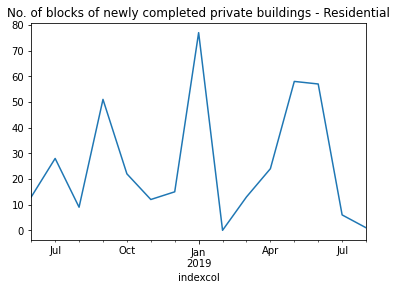

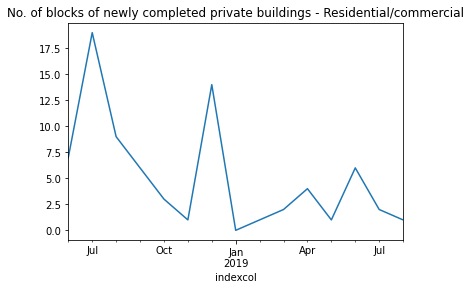

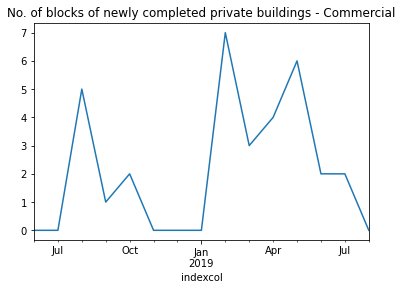

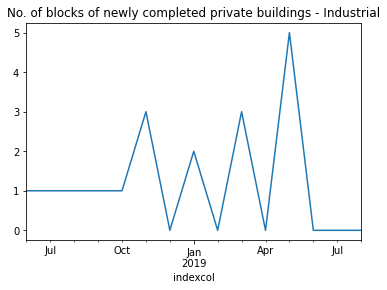

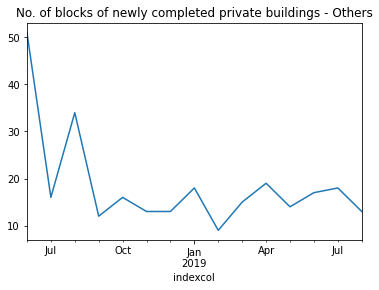

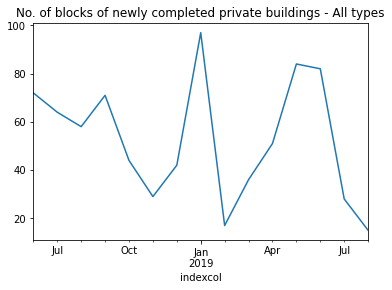

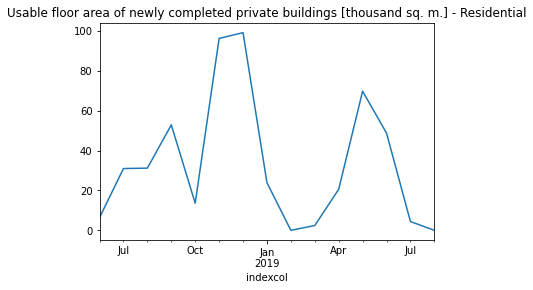

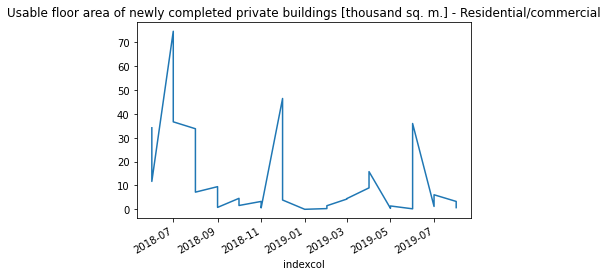

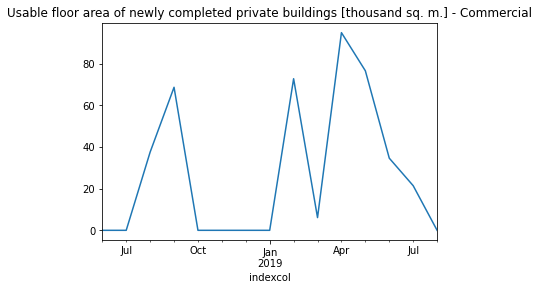

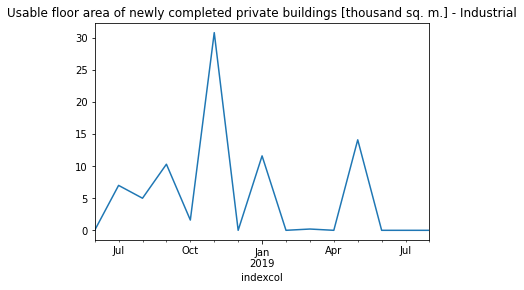

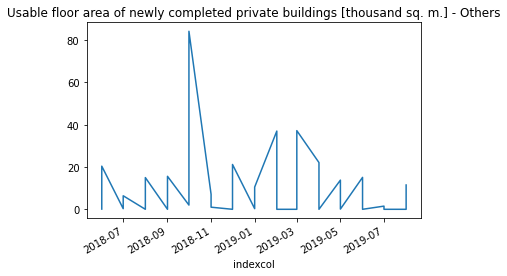

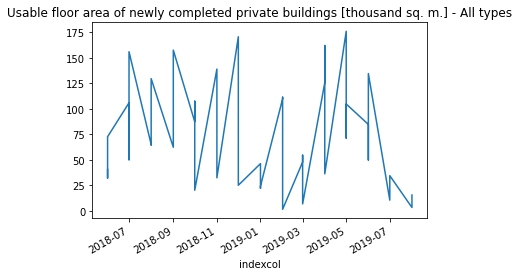

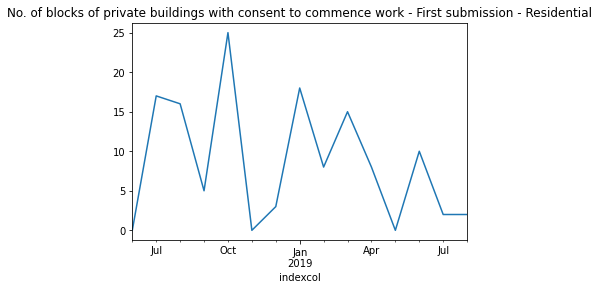

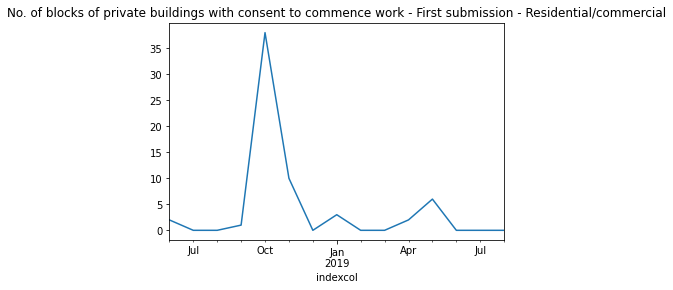

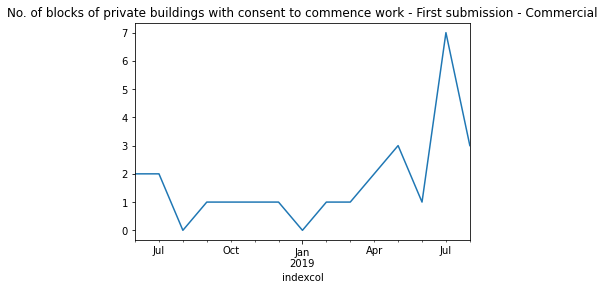

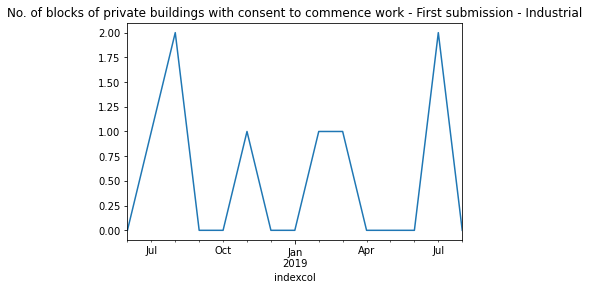

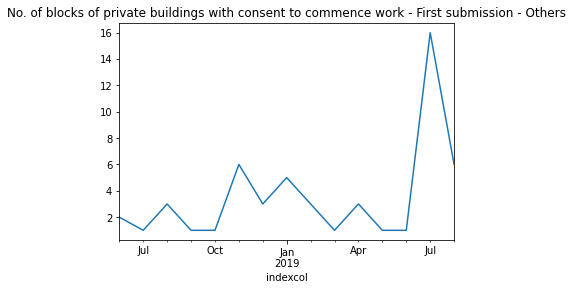

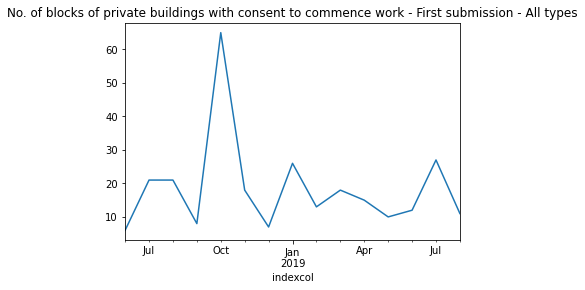

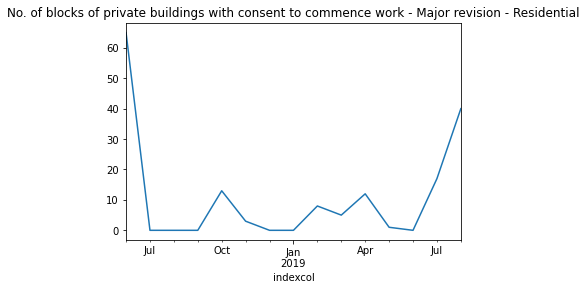

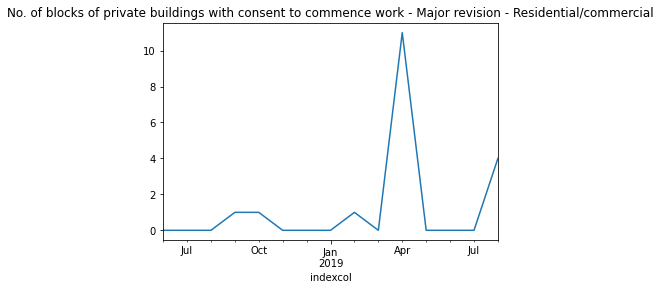

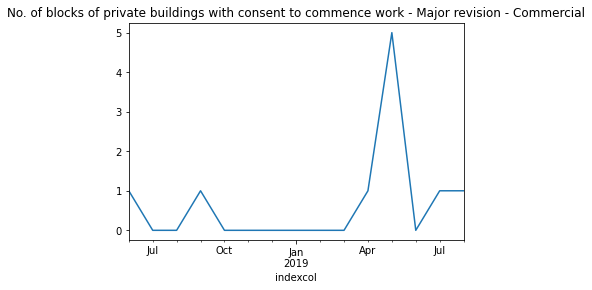

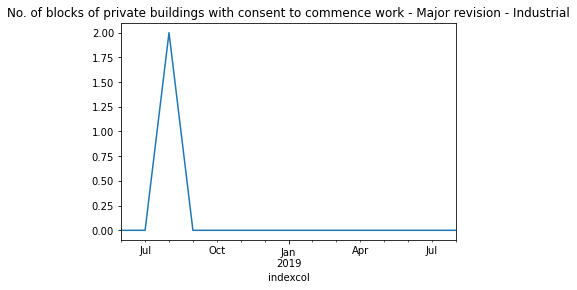

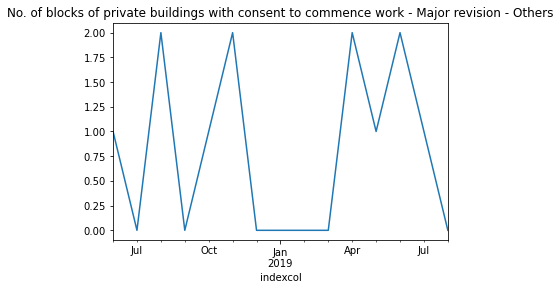

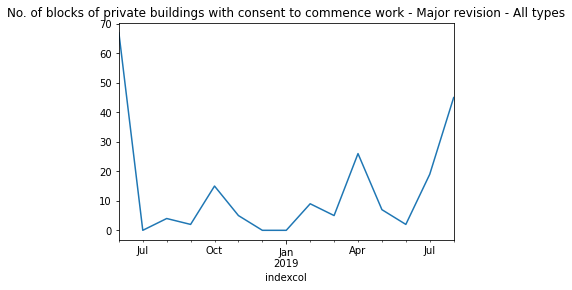

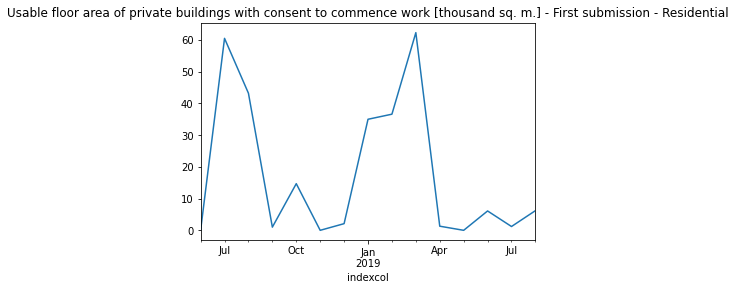

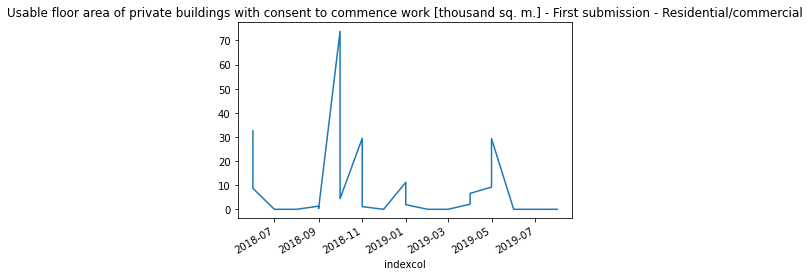

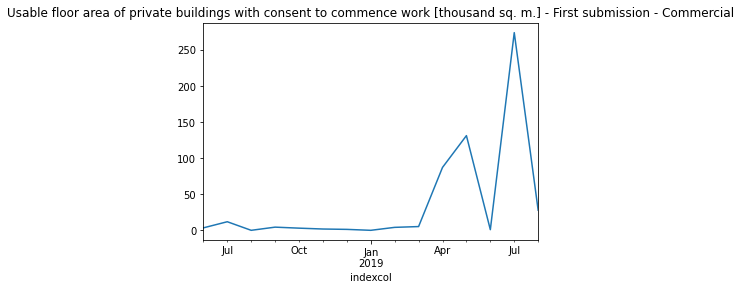

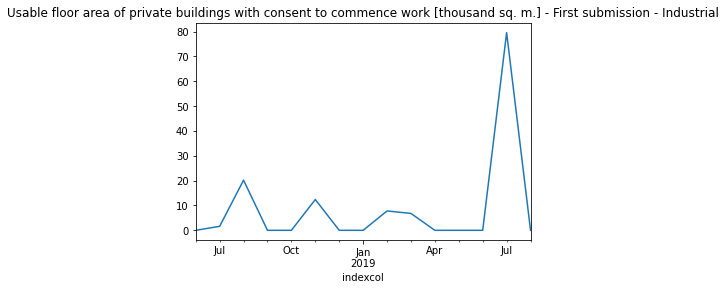

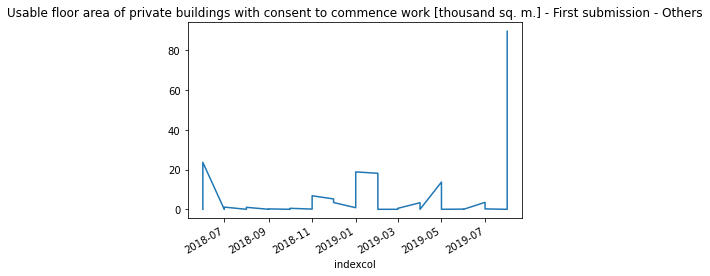

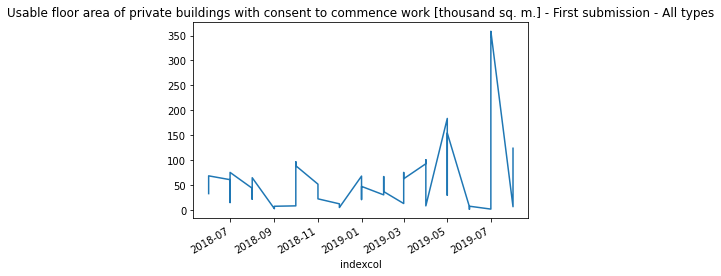

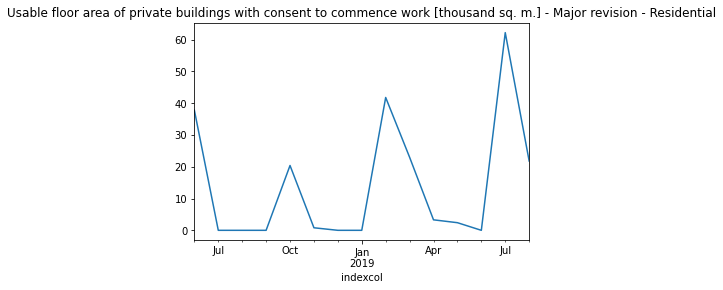

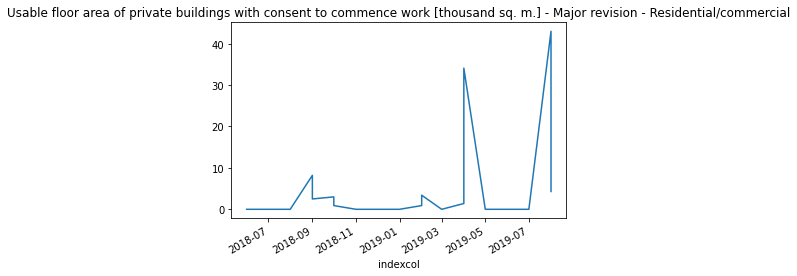

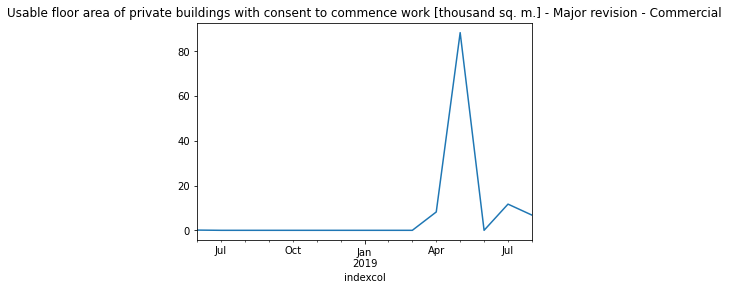

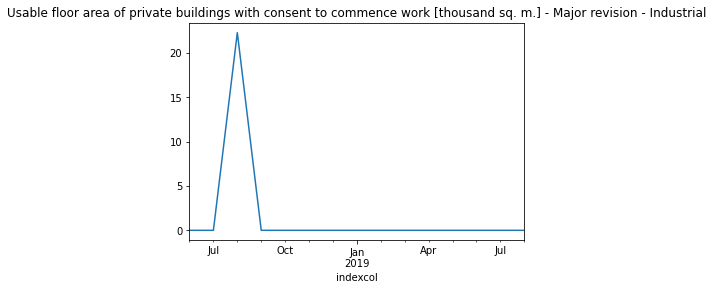

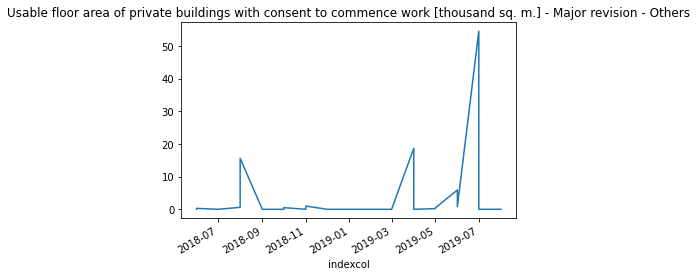

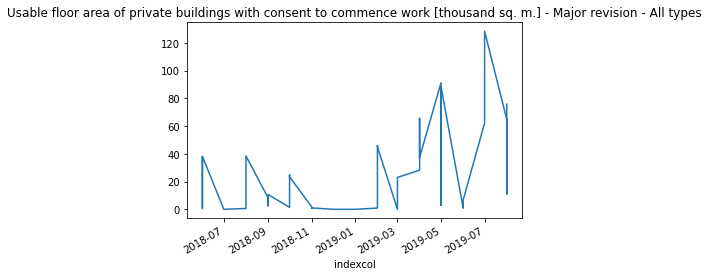

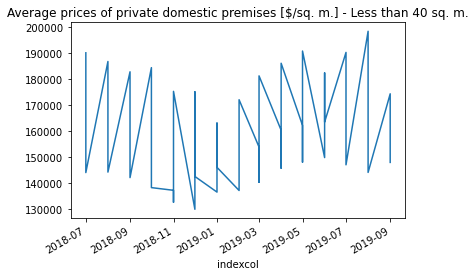

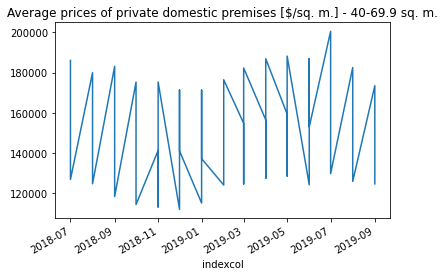

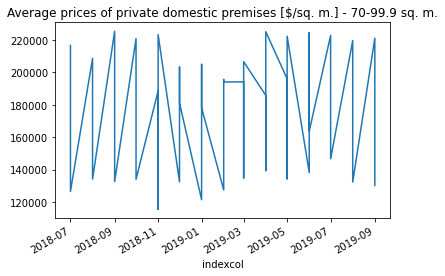

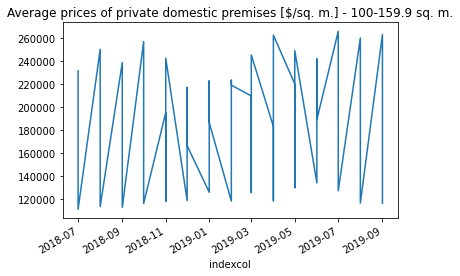

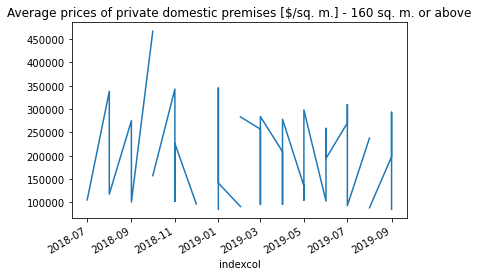

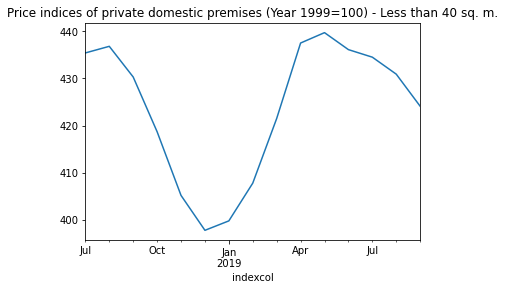

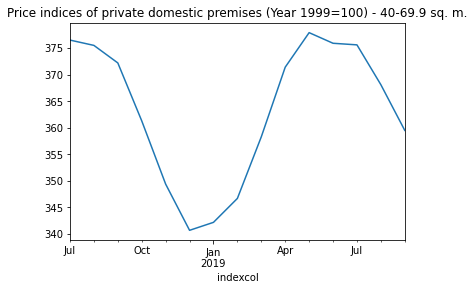

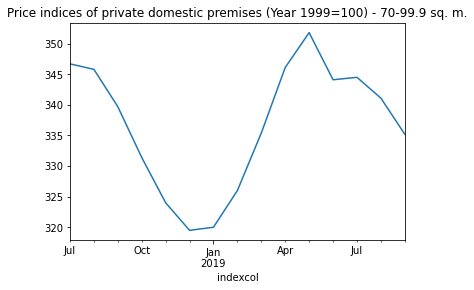

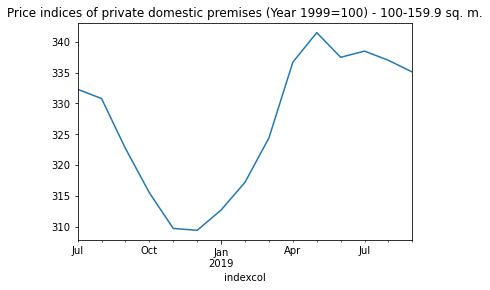

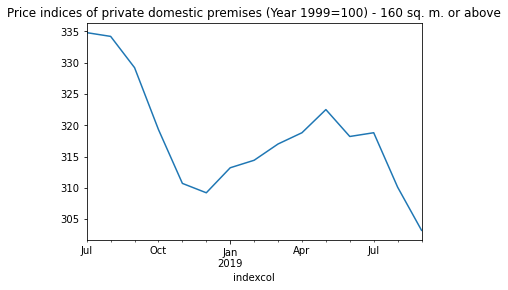

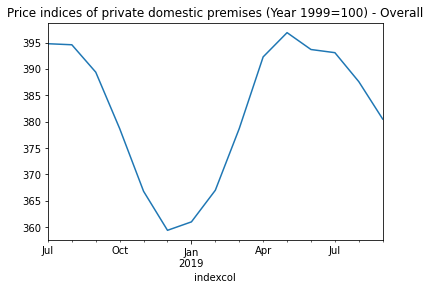

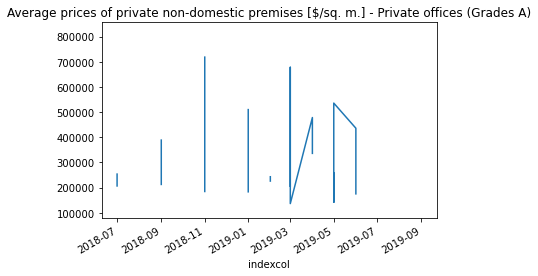

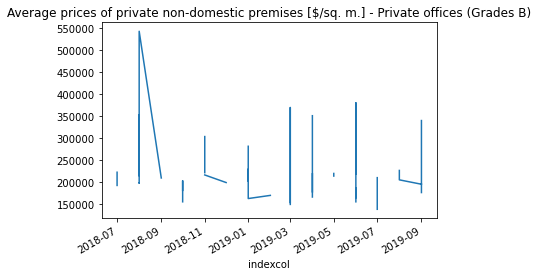

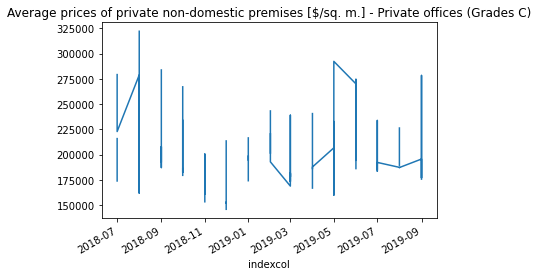

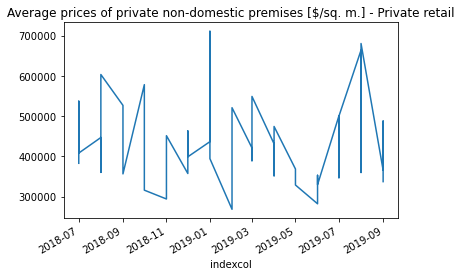

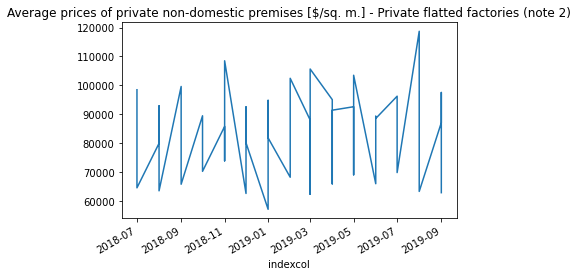

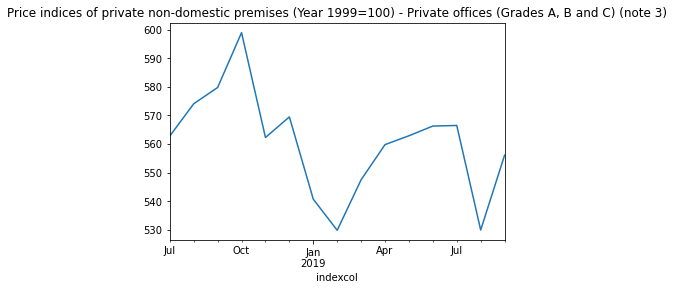

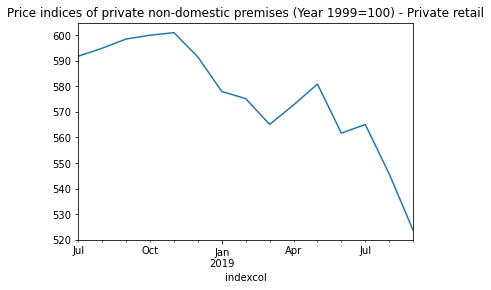

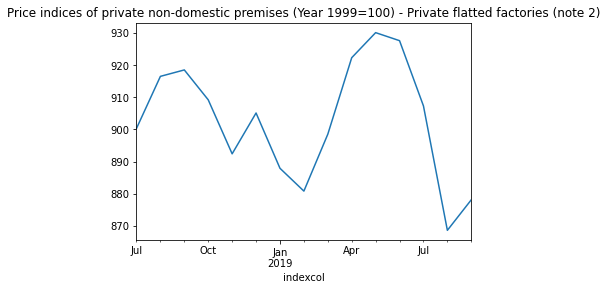

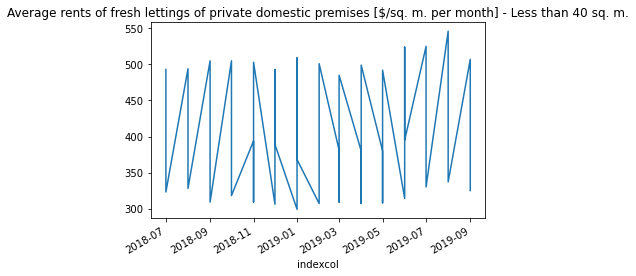

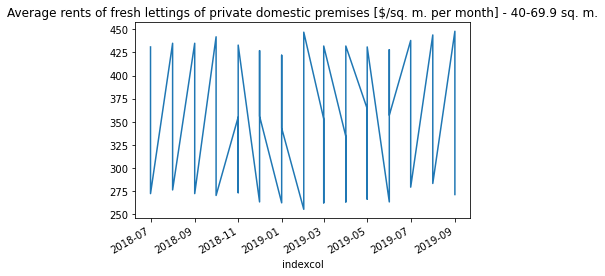

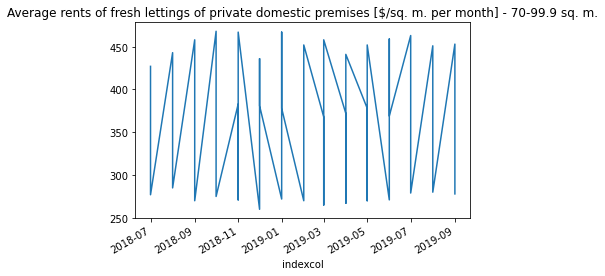

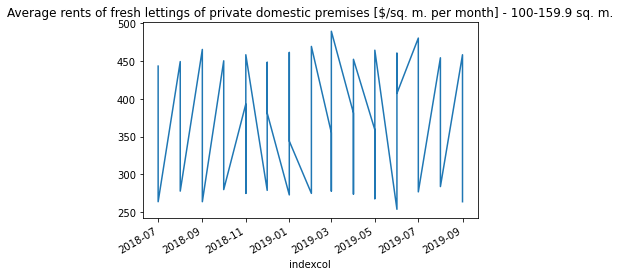

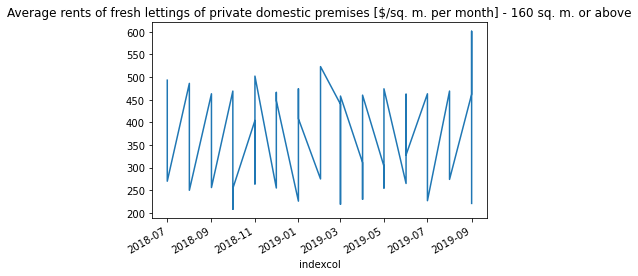

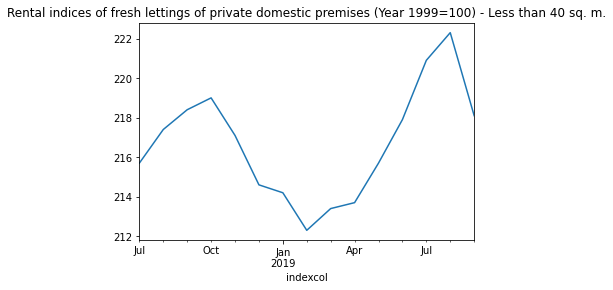

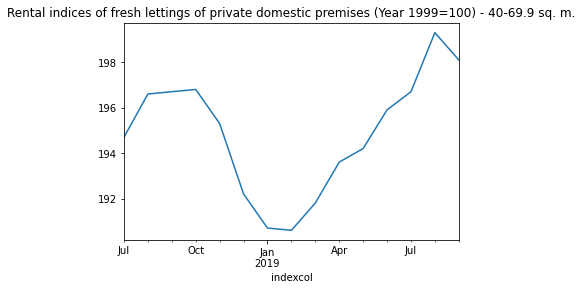

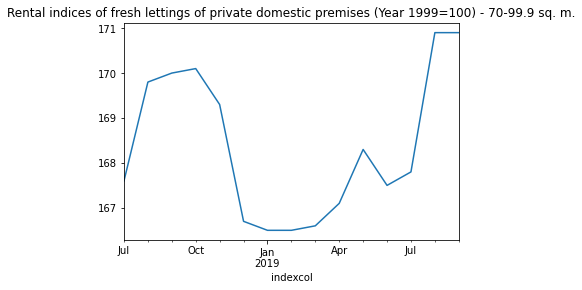

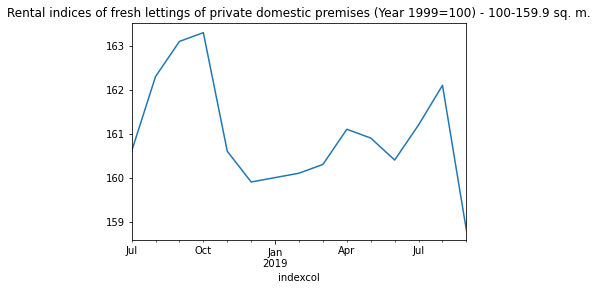

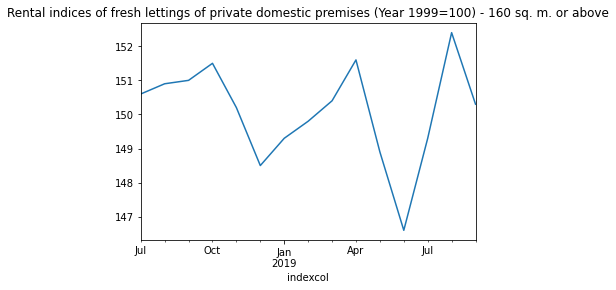

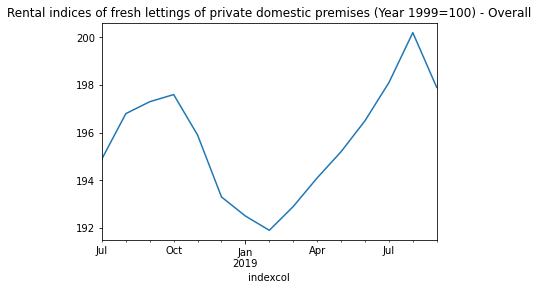

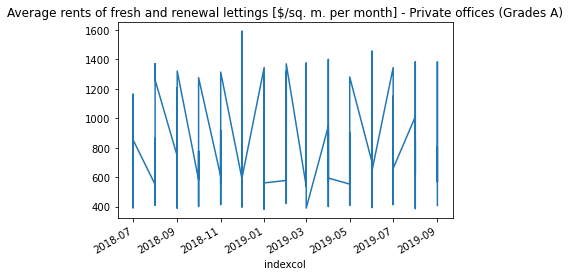

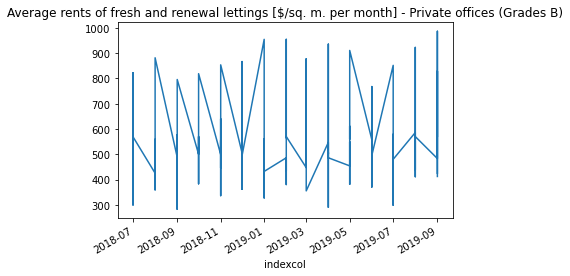

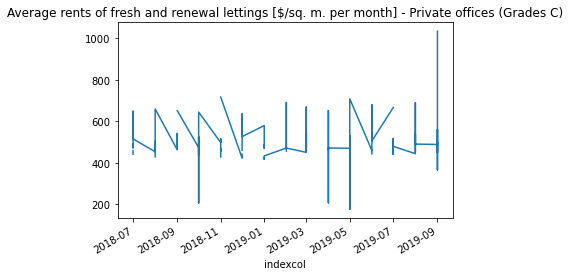

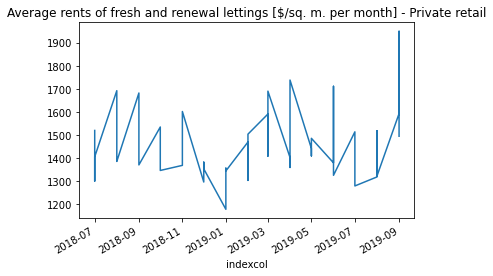

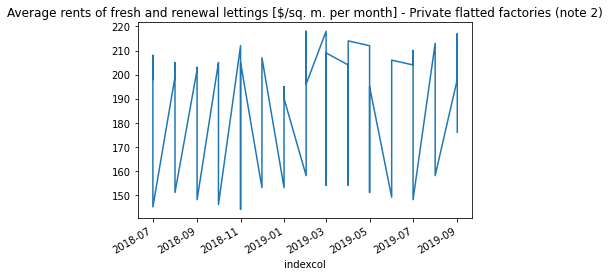

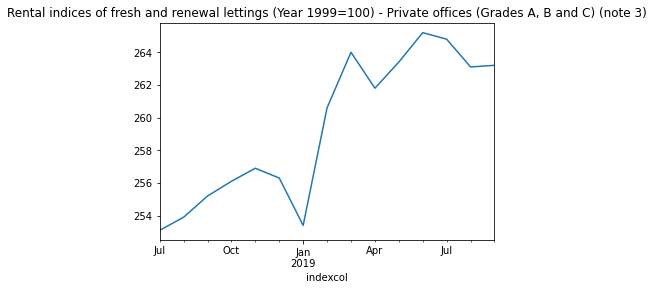

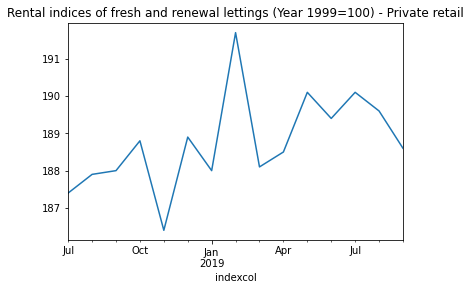

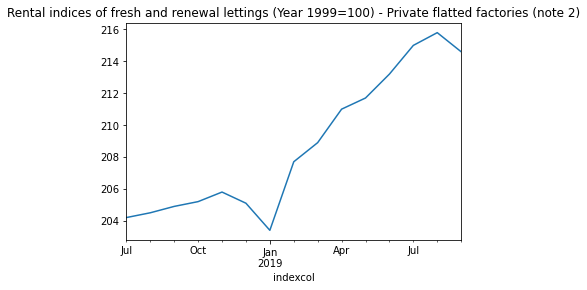

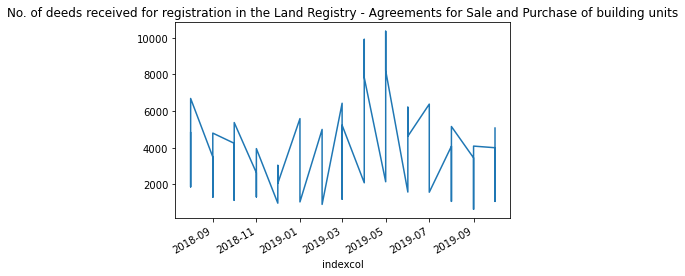

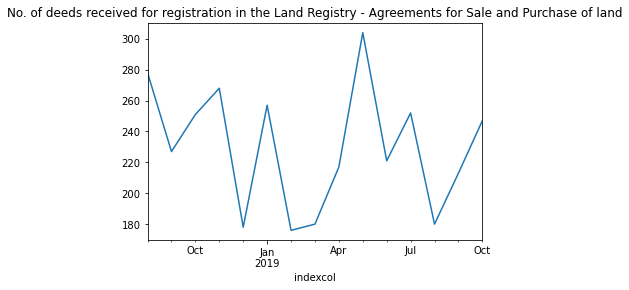

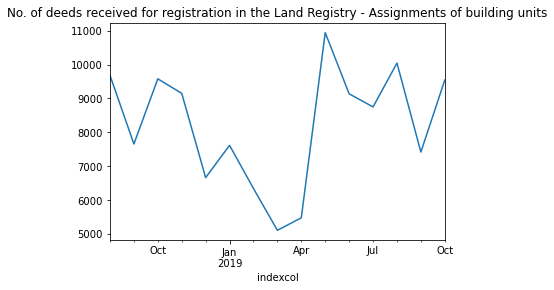

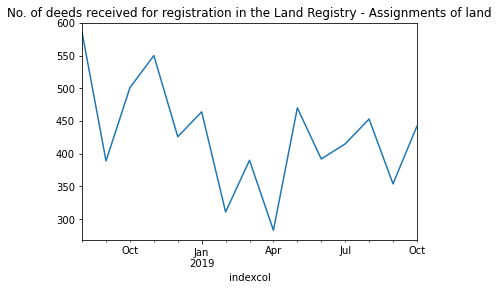

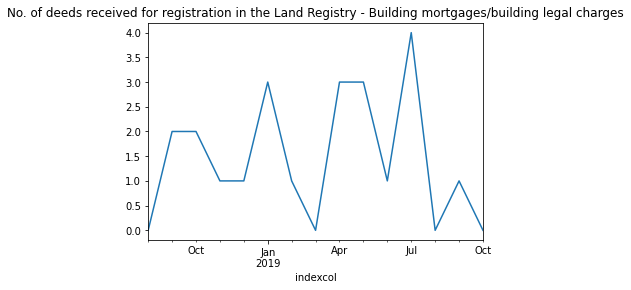

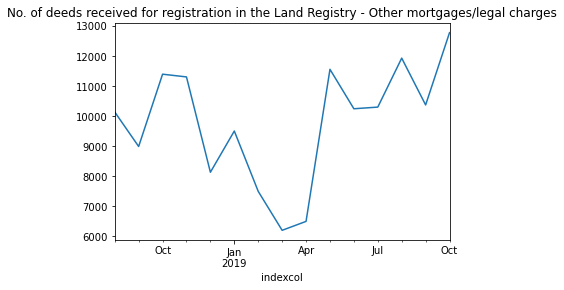

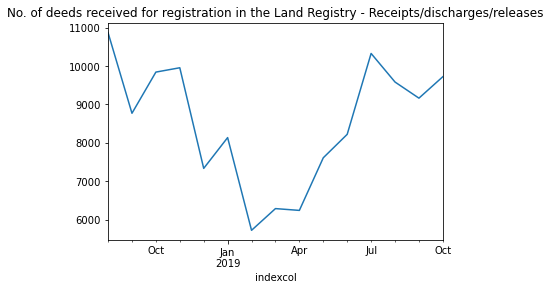

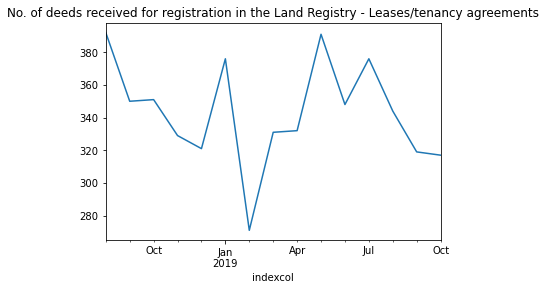

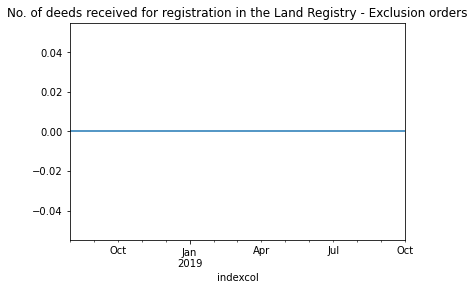

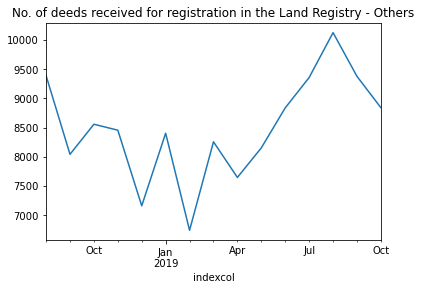

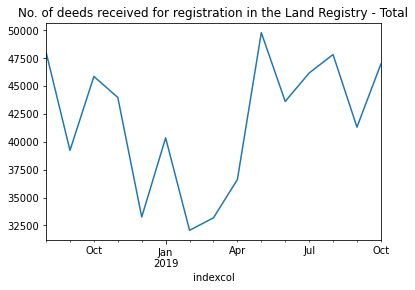

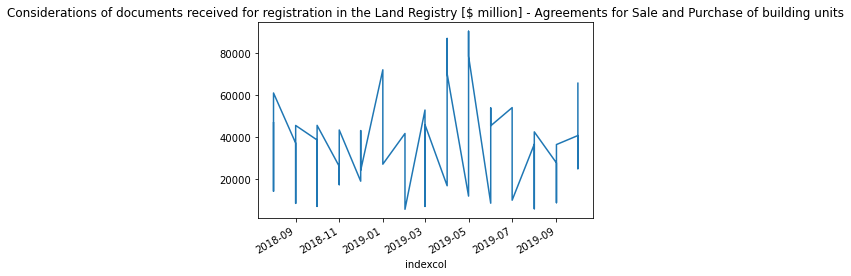

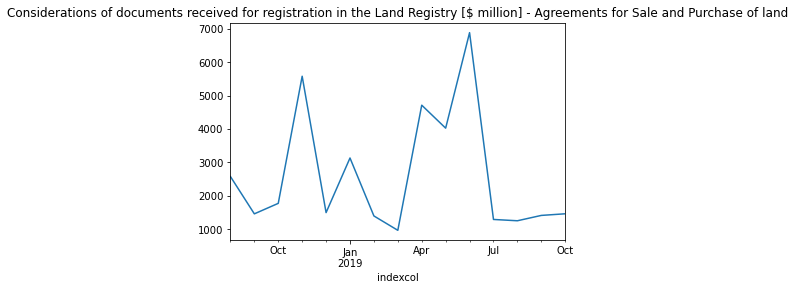

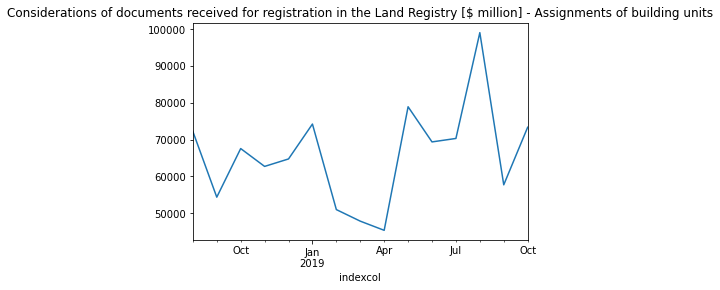

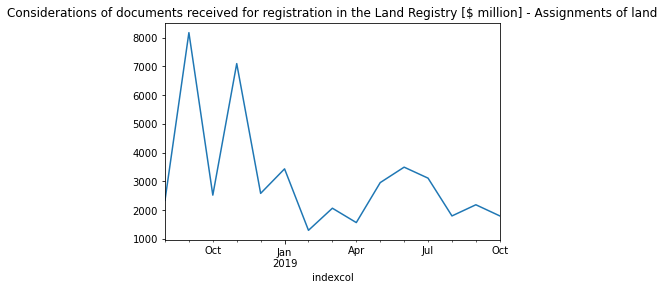

In [129]:
import matplotlib.pyplot as plt
import numpy as np

for file in dfiles[7:8]:
    print(file)
    df = pd.read_csv("data/%s/B10100022019MM11B/%s"%(today,file))
    desc = pd.read_csv("data/%s/B10100022019MM11B/%s"%(today,file.replace("master","description")))[['category','code','desc_e']]
    desca = desc[desc['category']=='stat']
    desca = desca.set_index('code')['desc_e']
    c1 = desc[desc['category'].isin(['class1_code','class2_code'])].drop_duplicates(subset='code')
    c1 = c1.set_index('code')['desc_e']
    tables = df['table'].unique()
    tables
    for table in tables:
        dft = df[df['table']==table]
        stats = dft['stat'].unique()
        for stat in stats:
            dfts = dft[dft['stat']==stat]
            for label,group in dfts.groupby(['class1_code'],dropna=False):
                group = group.dropna(subset=['period'])
                group = group[group['period']!='End']
                group = group[group['period']!='Mid']
                group = group[group['period']!='Q1']
                group = group[group['period']!='Q2']
                group = group[group['period']!='Q3']
                group = group[group['period']!='Q4']
                if len(group)>5:
                    if "-" in group['period'].unique()[0]:
                        pass
#                        group['tomonth'] = group['period'].apply(lambda x: x.split(" -  ")[1])
#                        group['indexcol'] = pd.to_datetime(group['year'].astype(int).astype(str) + ['-']*len(group) + group['tomonth'].astype(str) + ['-01']*len(group))                        
#
#                    elif ' - ' in group['period'].unique()[0]:
#                        
#                        group['tomonth'] = group['period'].apply(lambda x: x.split(" - ")[1].split("/")[0])
#                        group['toyear'] = group['period'].apply(lambda x: x.split(" - ")[1].split("/")[1][:4])                        
#                        group['indexcol'] = pd.to_datetime(group['toyear'].astype(str) + ['-']*len(group) + group['tomonth'].astype(str) + ['-01']*len(group))
                    else:
                        plt.figure()
                        group['indexcol'] = pd.to_datetime(group['year'].astype(int).astype(str) + ['-']*len(group) + group['period'].astype(int).astype(str) + ['-01']*len(group))
                        group = group.set_index('indexcol')
                        group = group.replace("‡",np.nan)
                        group = group.replace("〜",np.nan)
                        
                        group = group.replace("§",0)
                        if pd.isnull(label) == True:
                            display(group['figure'].astype(float).plot(title=desca[stat]))
                        else:
                            print(stat,label)
                            display(group['figure'].astype(float).plot(title=desca[stat]+" - "+c1[label]))

In [90]:
desca[stat]

'Composite Consumer Price Index (October 2014 to September 2015=100)'

In [113]:
c1.index

Index(['ipind_0101', 'ipind_0102', 'ipind_0103', 'ipind_0104', 'ipind_0105',
       'ipind_01tt', 'ipind_02', 'cwloc_01', 'cwloc_02', 'cwloc_tt', 'site_01',
       'site_02', 'site_tt', 'retail_tt', 'retail_01', 'retail_0101',
       'retail_0102', 'retail_0103', 'retail_0104', 'retail_0105', 'retail_02',
       'retail_03', 'retail_04', 'retail_0401', 'retail_0402', 'retail_05',
       'retail_0501', 'retail_0502', 'retail_0503', 'retail_06', 'retail_07',
       'retail_08', 'retail_0801', 'retail_0802', 'retail_0803', 'retail_0804',
       'retail_0805', 'retail_09', 'rest_tt', 'rest_01', 'rest_02', 'rest_03',
       'rest_04', 'rest_05', 'perd_01', 'perd_02', 'part_01', 'part_02',
       'brind_01', 'brind_02', 'brind_03', 'brind_04', 'brind_0401',
       'brind_0402', 'brind_0403', 'brind_05', 'brind_06', 'brind_07',
       'brind_08', 'brind_09', 'brind_0901', 'brind_0902', 'brind_10',
       'brind_11', 'brind_1101', 'brind_110101', 'brind_12', 'brind_13',
       'brind_14', 'bri

In [127]:
c1['farea_04']

code
farea_04    100-159.9 sq. m.
farea_04     100-159.9 sq.m.
Name: desc_e, dtype: object